In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
from scipy.sparse import linalg
from scipy.linalg import eigvals

## Using GMRES simply

In [2]:
N =10000
identity_matrix = np.eye(N)
#identity_matrix[1,1] = 5

w = np.linspace(0.1, 1, N)
A = sp.diags([w], [0])


b = np.random.rand(N)
#print(b)

Residual: [0.0] 



<ipython-input-3-980cabdfe66f>:14: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.xscale('log')
<ipython-input-3-980cabdfe66f>:15: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


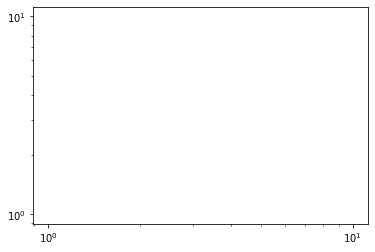

In [3]:
residual = []

def f(res):
    global residual
    residual.append(res)


x, info = linalg.gmres(identity_matrix,b, callback=f,maxiter=10,tol=1e-20)
#print('\n Solutions: \n',x,'\n')
print('Residual:', residual,'\n')


plt.plot(np.arange(0,len(residual)),residual)
plt.xscale('log')
plt.yscale('log')

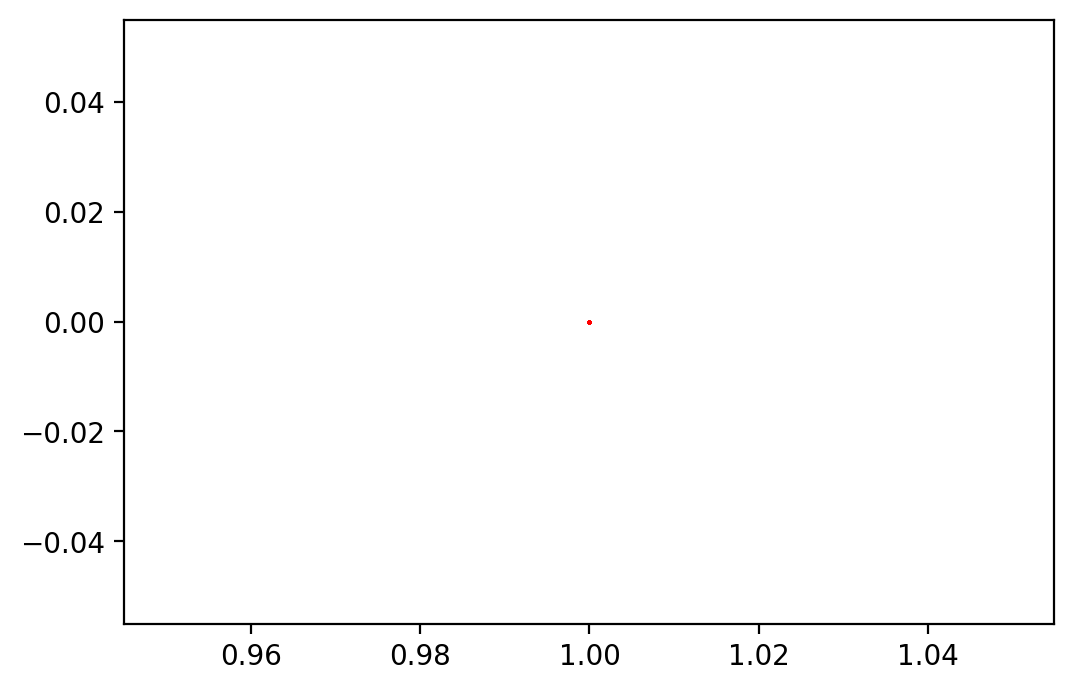

In [4]:
eigenvalues = eigvals(identity_matrix)

plt.figure(dpi=200)
plt.plot(np.real(eigenvalues), np.imag(eigenvalues), 'rx', markersize=1)

## Experimenting with GMRES

In [11]:
N = 21

b = np.random.rand(N)
a_matrix = np.random.rand(N, N) / np.sqrt(N)
print(np.linalg.cond(a_matrix))

146.60910807986534


1000


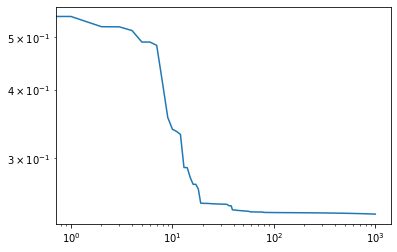

In [12]:
residual = []

solution, info = sp.linalg.gmres(a_matrix, b,callback=f,tol=1e-10,maxiter=1000)
#print('Residual:', residual,'\n')
print(len(residual))

plt.plot(np.arange(0,len(residual)),residual)
plt.xscale('log')
plt.yscale('log')

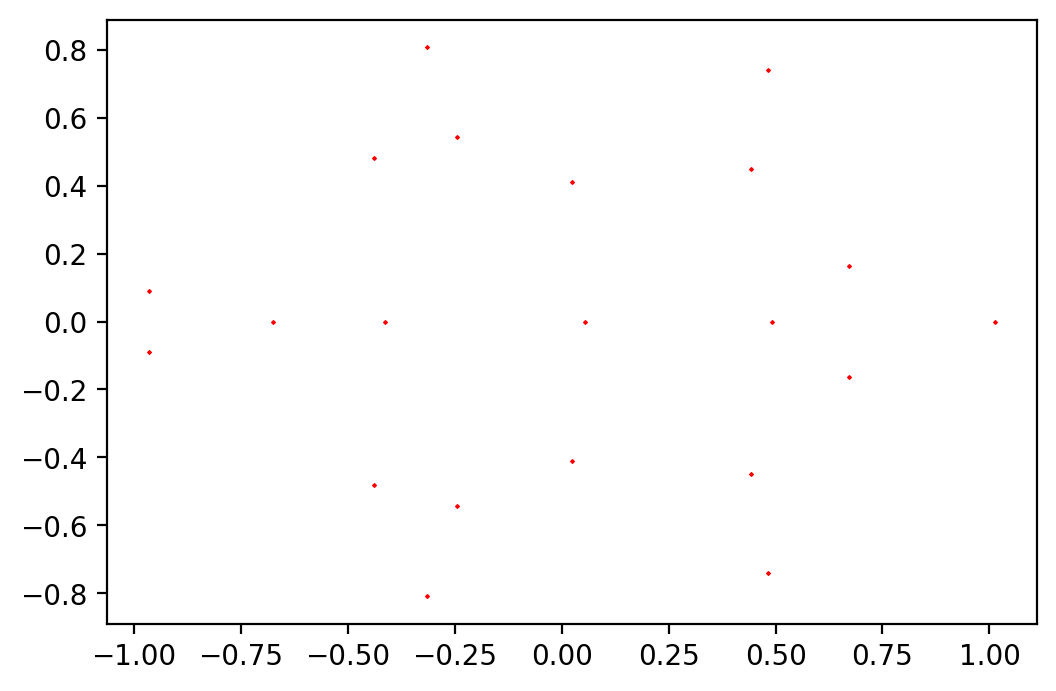

In [123]:
eigenvalues = eigvals(a_matrix)

plt.figure(dpi=200)
plt.plot(np.real(eigenvalues), np.imag(eigenvalues), 'rx', markersize=1)

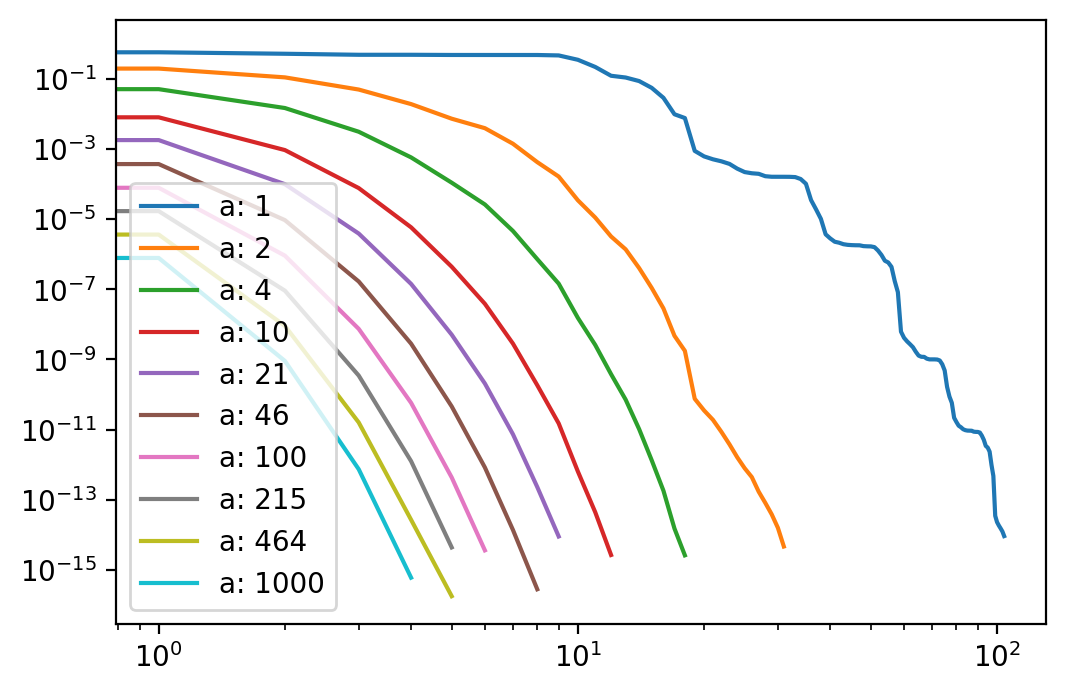

In [140]:
identity_matrix = np.eye(N)
alpha = np.logspace(0,3,10,dtype=int)
#alpha = np.array([1j,-10,-1,0,1,10])



plt.figure(dpi=200)
for i in range(len(alpha)):
    residual = []
    A = a_matrix + alpha[i]*identity_matrix
    solution, info = sp.linalg.gmres(A, b,callback=f,tol=1e-14,maxiter=1000)
    plt.plot(np.arange(0,len(residual)),residual, label=f'a: {alpha[i]}')
plt.xscale('log')
plt.yscale('log')
plt.legend()

The more diagonal the matrix is the more quickly the matrix solution can be found using the iterator.

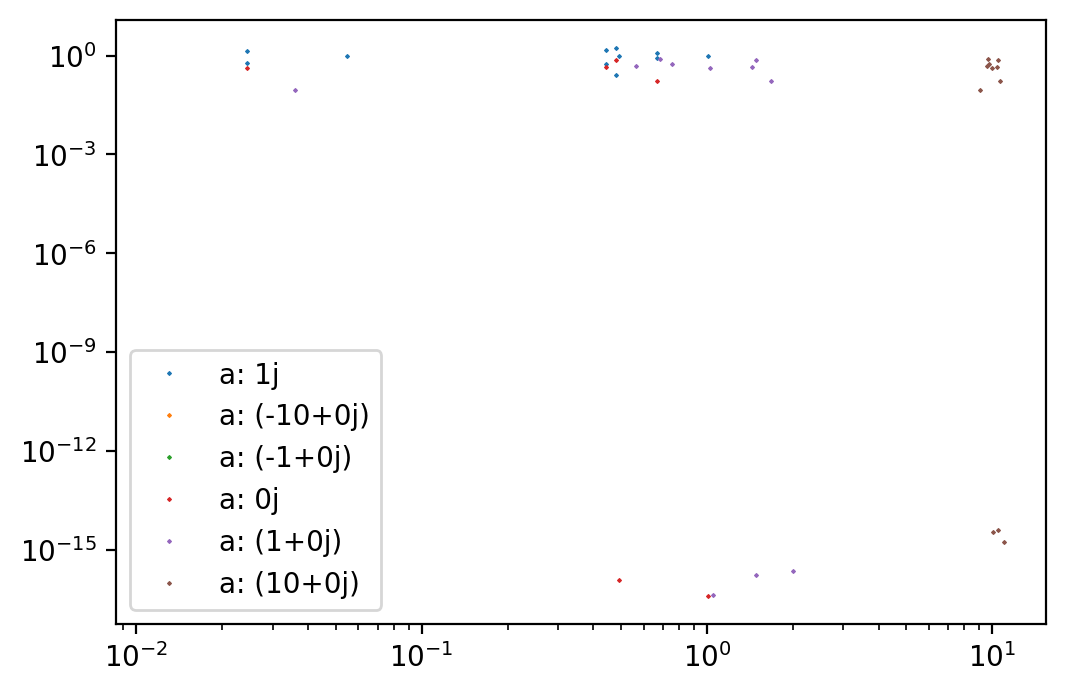

In [137]:
identity_matrix = np.eye(N)
#alpha = np.logspace(0,3,10,dtype=int)
alpha = np.array([1j,-10,-1,0,1,10])

colour = ['rx','bx','yx','gx']

plt.figure(dpi=200)
for i in range(len(alpha)):
    residual = []
    A = a_matrix + alpha[i]*identity_matrix
    eigenvalues = eigvals(A)
    plt.plot(np.real(eigenvalues), np.imag(eigenvalues), 'x', markersize=1, label=f'a: {alpha[i]}')
plt.xscale('log')
plt.yscale('log')
plt.legend()

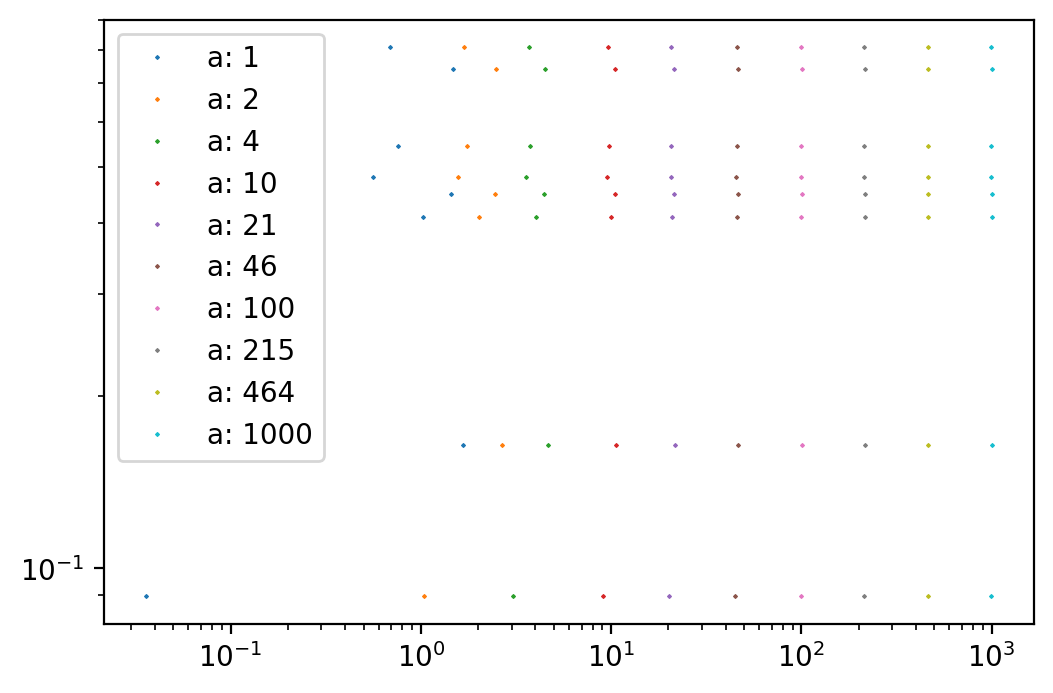

In [138]:
identity_matrix = np.eye(N)
alpha = np.logspace(0,3,10,dtype=int)


colour = ['rx','bx','yx','gx']

plt.figure(dpi=200)
for i in range(len(alpha)):
    residual = []
    A = a_matrix + alpha[i]*identity_matrix
    eigenvalues = eigvals(A)
    plt.plot(np.real(eigenvalues), np.imag(eigenvalues), 'x', markersize=1, label=f'a: {alpha[i]}')
plt.xscale('log')
plt.yscale('log')
plt.legend()

Looks like for large alpha the GMRES works better than for small alpha as there is a clearer 